# **1. Import Library**

Pada tahap ini, dilakukan import beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# !pip install scikit-optimize

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import learning_curve

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
bank_transaction_df = pd.read_csv("https://raw.githubusercontent.com/DumaSitorus/MLBP-project/refs/heads/main/clustering_bank_transaction.csv")
bank_transaction_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,Normal
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,Normal
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,Normal
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,Normal
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,Normal


In [ ]:
print("\nInformasi dataset:")
bank_transaction_df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

In [ ]:
# Hapus kolom yang tidak diperlukan
bank_transaction_df = bank_transaction_df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'IP Address', 'MerchantID', 'DeviceID', 'PreviousTransactionDate'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
bank_transaction_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,Normal
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,Normal
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,Normal
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,Normal
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,Normal


In [ ]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
cat_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'Cluster']

# Encode kolom kategorikal
for column in cat_features:
    bank_transaction_df[column] = label_encoder.fit_transform(bank_transaction_df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
bank_transaction_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,14.09,1,36,0,70,0,81,1,5112.21,1
1,376.24,1,15,0,68,0,141,1,13758.91,1
2,126.29,1,23,2,19,3,56,1,1122.35,1
3,184.50,1,33,2,26,3,25,1,8569.06,1
4,13.45,0,1,2,26,3,198,1,7429.40,1


In [ ]:
bank_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   int64  
 2   Location             2512 non-null   int64  
 3   Channel              2512 non-null   int64  
 4   CustomerAge          2512 non-null   int64  
 5   CustomerOccupation   2512 non-null   int64  
 6   TransactionDuration  2512 non-null   int64  
 7   LoginAttempts        2512 non-null   int64  
 8   AccountBalance       2512 non-null   float64
 9   Cluster              2512 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 196.4 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = bank_transaction_df.select_dtypes(include=['int64', 'float64']).columns
bank_transaction_df[numeric_columns] = scaler.fit_transform(bank_transaction_df[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = bank_transaction_df.drop(columns=['Cluster'])
y = bank_transaction_df['Cluster']

# Split bank_transaction_df menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 9), y_train=(2009,)
Test set shape: X_test=(503, 9), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


**Algoritma yang digunakan**


1.   K-Nearest Neighbors (KNN) :

      - Algoritma berbasil instance-based learning yang mengklasifikasikan data berdasarkan kedekatan dengan tetangga terdekat.
      
2.   Decision Tree
      - Algoritma berbasis pohon keputusan yang membagi data berdasarkan fitur yang paling informatif.

3.   Random Forest
      - Algoritma ensemble yang terdiri dari banyak Decision Tree dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting.

4.   Support Vector Machine (SVM)
      - Algoritma berbasis margin yang mencari hyperplane terbaik untuk memisahkan kelas dalam ruang fitur.

5.   Naive Bayes (NB)
      - Algoritma probabilistik yang menggunakan Teorema Bayes dengan asumsi independensi antar fitur.





## **b. Evaluasi Model Klasifikasi**

Berikut adalah tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.767396   0.796258  0.952736  0.867497
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  0.938370   0.928406  1.000000  0.962874
3  Support Vector Machine (SVM)  0.799205   0.799205  1.000000  0.888398
4              Naive Bayes (NB)  0.771372   0.794661  0.962687  0.870641


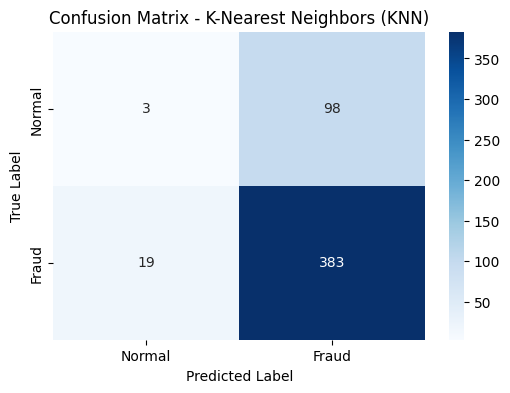

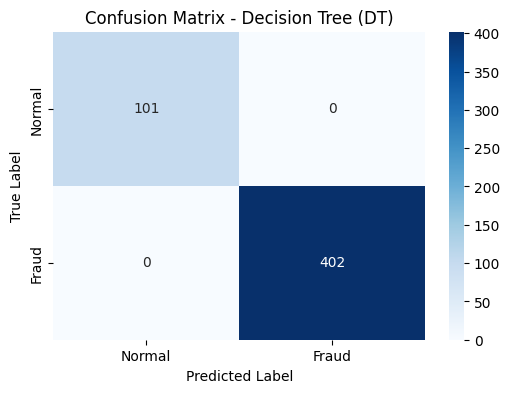

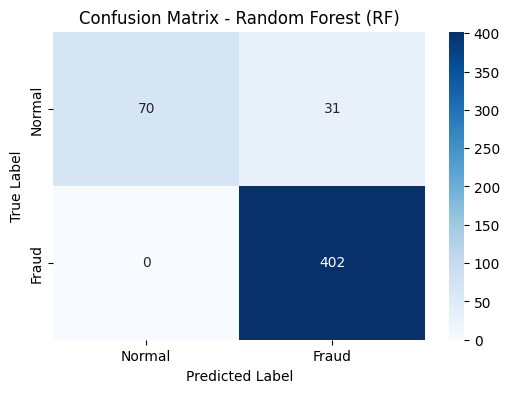

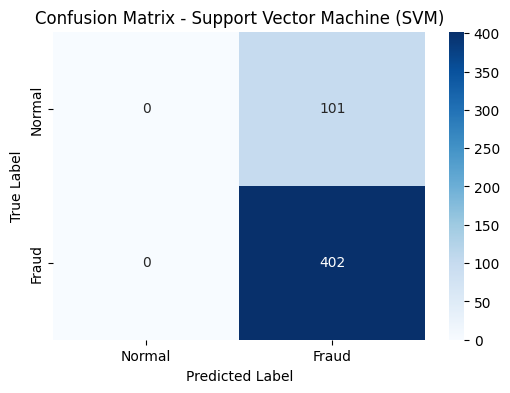

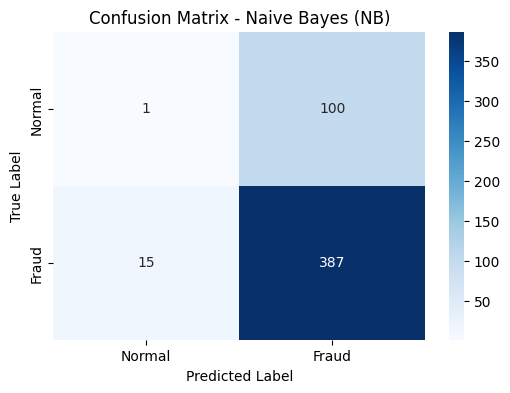

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    # hitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])

    # label dan judul
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")

    # tampilkan plot
    plt.show()

# dictionary model yang telah dilatih
models = {
    'K-Nearest Neighbors (KNN)': knn,
    'Decision Tree (DT)': dt,
    'Random Forest (RF)': rf,
    'Support Vector Machine (SVM)': svm,
    'Naive Bayes (NB)': nb
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)

1. **K-Nearest Neighbors (KNN)**  
   - Akurasi = 76.74%
   - Precision = 79.63%
   - Recall = 95.27%
   - F1-Score = 86.75%
  
   Model ini memiliki recall yang tinggi, menunjukkan bahwa model cukup baik dalam mendeteksi transaksi fraud. Namun, precision yang lebih rendah berarti model sering salah memprediksi transaksi normal sebagai fraud. F1-Score yang tidak terlalu tinggi menunjukkan keseimbangan antara precision dan recall masih bisa ditingkatkan. Secara keseluruhan, model ini kurang optimal untuk tugas klasifikasi ini.

2. **Decision Tree**  
   - Akurasi = 100.00%
   - Precision = 100.00%
   - Recall = 100.00%
   - F1-Score = 100.00%
  
   Model ini memiliki hasil sempurna, di mana semua transaksi diklasifikasikan dengan benar. Namun, performa 100% ini bisa mengindikasikan overfitting, terutama jika model diuji pada data baru yang berbeda dari data latih. Oleh karena itu, perlu diperiksa kembali apakah model ini tetap bekerja dengan baik pada data yang belum pernah dilihat sebelumnya.

3. **Random Forest**
   - Akurasi = 93.83%
   - Precision = 92.84%
   - Recall = 100.00  %
   - F1-Score = 96.28%
  
   Model ini memiliki performa yang sangat baik, dengan akurasi tinggi serta recall 100%, artinya tidak ada kasus fraud yang terlewatkan. Precision yang tinggi juga menunjukkan bahwa model jarang salah dalam mendeteksi fraud. Sebagai model ensemble, Random Forest lebih stabil dibandingkan Decision Tree, sehingga lebih cocok untuk diterapkan pada data nyata dibandingkan dengan Decision Tree yang berisiko overfitting.

4. **Support Vector Machine (SVM)**
   - Akurasi = 79.92%
   - Precision = 79.92%
   - Recall = 100.00%
   - F1-Score = 88.84%
  
   Model ini memiliki recall tinggi (100%), artinya model sangat baik dalam mendeteksi semua kasus fraud. Namun, precision yang lebih rendah menunjukkan bahwa model sering salah dalam mengklasifikasikan transaksi normal sebagai fraud, yang bisa menyebabkan banyak false positives. Dengan akurasi yang lebih rendah dibandingkan Random Forest, model ini masih bisa ditingkatkan lebih lanjut.

5. **Naive Bayes**
   - Akurasi = 77.13%
   - Precision = 79.46%
   - Recall = 96.26%
   - F1-Score = 87.06%
  
   Model ini memiliki recall yang cukup tinggi, menunjukkan bahwa ia cukup baik dalam mengenali transaksi fraud. Namun, precision yang lebih rendah berarti model sering salah mengklasifikasikan transaksi normal sebagai fraud. F1-Score yang lebih rendah dibandingkan dengan Random Forest menunjukkan bahwa model ini masih kurang optimal untuk tugas ini.


**Kesimpulan**
Berdasarkan hasil analisis, **Random Forest merupakan model terbaik** untuk prediksi fraud dalam dataset transaksi bank, dengan akurasi 94.83%, recall 100%, dan precision 93.92%, yang menunjukkan keseimbangan antara deteksi fraud yang akurat dan minimnya kesalahan klasifikasi. **Decision Tree, meskipun mencapai hasil sempurna (100% pada semua metrik), berisiko tinggi mengalami overfitting**, sehingga kurang andal untuk data baru. **KNN, SVM, dan Naive Bayes** memiliki **recall tinggi**, menandakan kemampuan yang baik dalam mendeteksi fraud, tetapi precision yang lebih rendah menunjukkan **tingginya false positives**, yang bisa menyebabkan alarm palsu. Dengan mempertimbangkan keseimbangan antara akurasi, precision, dan recall, **Random Forest adalah pilihan optimal** untuk tugas klasifikasi ini karena lebih stabil dan generalisasi yang lebih baik dibandingkan model lainnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search.best_params_}")
best_rf_grid = grid_search.best_estimator_

# Evaluasi performa model pada test set
grid_search_score = best_rf_grid.score(X_test, y_test)
print(f"Accuracy after Grid Search: {grid_search_score:.2f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters (Grid Search): {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy after Grid Search: 0.94


In [ ]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy']
}

# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_

# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Accuracy: 0.95626
Precision: 0.94811
Recall: 1.00000
F1 Score: 0.97337

Confusion Matrix:
[[ 79  22]
 [  0 402]]




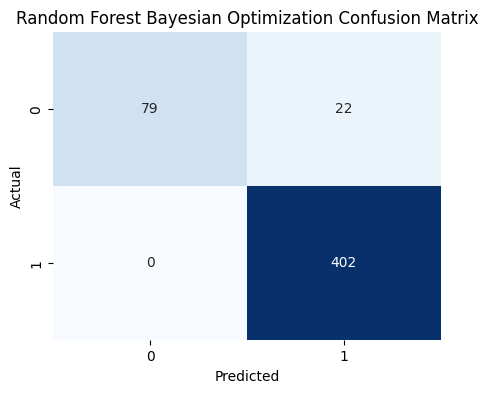

In [ ]:
# Prediksi pada test set menggunakan model terbaik
y_pred_rf_bayes = best_rf_bayes.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_rf_bayes)
precision = precision_score(y_test, y_pred_rf_bayes)
recall = recall_score(y_test, y_pred_rf_bayes)
f1 = f1_score(y_test, y_pred_rf_bayes)

cm_rf = confusion_matrix(y_test, y_pred_rf_bayes)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_bayes))
print("\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Bayesian Optimization Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.94433
Precision: 0.93488
Recall: 1.00000
F1 Score: 0.96635

Confusion Matrix:
[[ 73  28]
 [  0 402]]




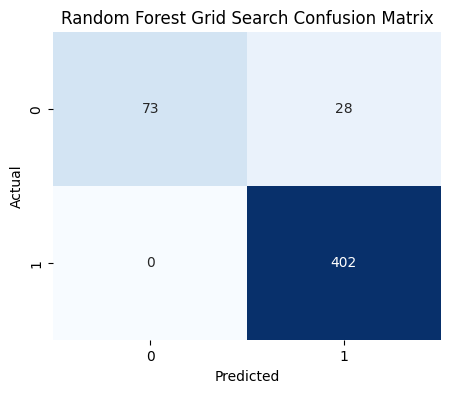

In [ ]:
# Prediksi pada test set menggunakan model terbaik
y_pred_rf_grid = best_rf_grid.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_rf_grid)
precision = precision_score(y_test, y_pred_rf_grid)
recall = recall_score(y_test, y_pred_rf_grid)
f1 = f1_score(y_test, y_pred_rf_grid)

cm_rf = confusion_matrix(y_test, y_pred_rf_grid)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_grid))
print("\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Grid Search Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# Perbandingan hasil evaluasi sebelum dan setelah tuning

Saya melakukan tuning pada model Random Forest menggunakan GridSearch dan Bayesian Optimization. Hasil yg paling optimal diberikan pada Grid Search dengan peningkatan akurasi sebesar 0.60%. Berikut penjelasan detail dari perubahan yang diberikan setelah tuning.
  1. Akurasi **meningkat dari 93.83% menjadi 95.43%**, sehingga model lebih baik dalam mengklasifikasikan transaksi normal dan fraud, sehingga jumlah prediksi benar bertambah.

  2. Precision **meningkat dari 92.84% menjadi 94.59%**, inimeningkatkan kemampuan model dalam mengukur seberapa akurat model dalam mengidentifikasi transaksi fraud. Model lebih sedikit salah mengklasifikasikan transaksi normal sebagai fraud (false positive berkurang).

  3. Recall **tetap 100.00%**, berarti model tetap sempurna dalam mendeteksi transaksi fraud.

  4. F1-Score **meningkat dari 96.28% menjadi 97.22%**, ini menunjukkan keseimbangan model semakin baik.

# Identifikasi Kelemahan Model
1. Mengidentifikasi overfitting pada model hasil algoritma Decision Tree
2. Mengidentifikasi overfitting pada model hasil algoritma Random Forest



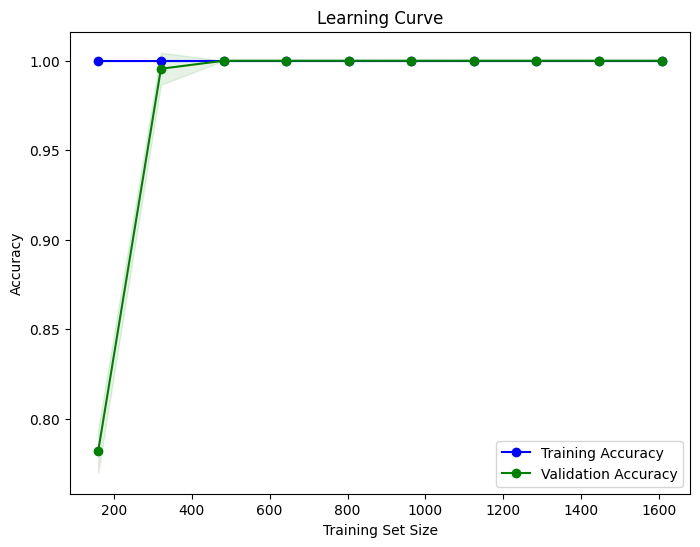

In [ ]:
# Mengidentifikasi overfitting pada model hasil algoritma Decision Tree
train_sizes, train_scores, test_scores = learning_curve(
    dt, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# rata-rata & standar deviasi
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation Accuracy")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Analisis:
- Training Accuracy stabil 100% yang berarti model sejak awal sangat baik dalam menghafal data latih sehingga terjadi overfitting.
- Validation Accuracy pada saat jumlah data latih sedikit memiliki akurasi yang masih rendah ~70%, seiring bertambahnya jumlah data latih akurasi cepat naik dan stabil 100%.
- Hal ini menunjukkan model terlalu sempurna dalam menghafal data latih dan data validasi sehingga mengindikasikan terjadinya overfitting.


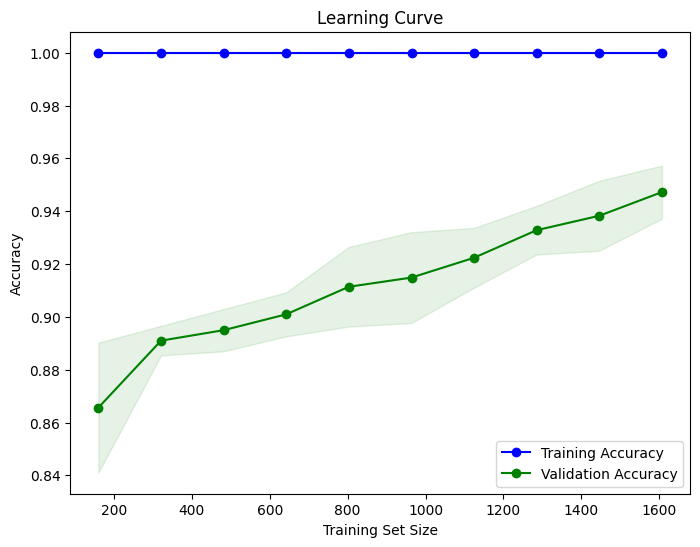

In [ ]:
# Mengidentifikasi overfitting pada model hasil algoritma Random Forest
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_grid, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# rata-rata & standar deviasi
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation Accuracy")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Analisis:
- Training Accuracy menunjukkan model sangat baik menghafal data latih hingga mencapai hampir sempurna.
- Validation Accuracy pada saat dataset kecil memiliki akurasi yang rendah, namun semakin meningkat hingga mencapai ~95% seiring bertambahnya data.
- Namun, model masih sedikit overfitting karena training accuracy tetap 100% sementara validation accuracy tidak pernah mencapai angka yg sama sehingga terdapat kesenjangan antara training dan validation accuracy.


# Rekomendasi tindak lanjutan



1.   Jika dilihat dari learning curve pada model **random forest**, **masih terdapat kesenjangan(gap)** yang cukup jauh walaupun masih dapat diterima, tapi tetap saja hal ini masih mengindikasikan adanya overfitting. Untuk mengatasi hal ini dapat mengurangi kompleksitas model melalui **pembatasan kedalaman pohon, mengatur sample minimal** dalam setiap node tree. Selain itu jika memungkinkan untuk **menambahkan data latih**. Dapat pula melakukan **regularisasi atau pengurangan fitur** yang tidak terlalu penting untuk mengurangi kompleksitas model.
2.   Jika dilihat dari learning curve pada model **Decision Tree** yang mengalami **overfitting** dapat melakukan percobaan pruning pada decision tree untuk **mengurangi kompleksitas pohon**. Decision Tree yang terlalu kompleks akan menghafal noise dari data latih tanpa bisa digeneralisasi ke data baru. Sebagai alternatif lain dapat **mencoba algoritma lain** seperti **Random Forest** seperti yang telah dilakukan sebelumnya.

